# Introduction to Scikit-Learn

### this notebook shows basic functions for scikit-learn

## Topics covered are:
0. End-to-end scikit-learn workflow
1. getting the data ready
2. Choosing the right estimator/algorithm for problem set
3. fitting the model/algorithm and using it to make predictions on data
4. evaluating a model
5. improving a model
6. saving and loading a trianed model
7. putting it all together

In [1]:
covered_topics = [
"0. End-to-end scikit-learn workflow",
"1. getting the data ready",
"2. Choosing the right estimator/algorithm for problem set",
"3. fitting the model/algorithm and using it to make predictions on data",
"4. evaluating a model",
"5. improving a model",
"6. saving and loading a trianed model",
"7. putting it all together"
]

In [2]:
#standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. End-to-end scikit-learn workflow

In [3]:
#1. getting the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Create x (features matrix)
x = heart_disease.drop("target", axis=1)

#create y (labels)
y = heart_disease["target"]


In [5]:
#2. Choosing the right model and hyperparameters 
from sklearn.ensemble import RandomForestClassifier

#clf stands for classifier
clf = RandomForestClassifier(n_estimators=100)

#keep default hyperparameters, except n_estimators, that hyperparameter is set to 100 to remove error
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
#3. Fit the model to the data
from sklearn.model_selection import train_test_split

#split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)


In [7]:
#find patterns in training data using classifier
clf.fit(x_train, y_train);

In [8]:
#make a prediction
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [9]:
#4. Evaluate the model on training data
clf.score(x_train, y_train)

1.0

In [10]:
#4. Evaluate the model on testing data
clf.score(x_test, y_test)

0.8032786885245902

In [11]:
#more ways to evaluate data with predictions and testing data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.79      0.79      0.79        29

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [12]:
confusion_matrix(y_test, y_preds)

array([[26,  6],
       [ 6, 23]])

In [13]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [14]:
#5. improve the model
#try different amount of n_estimators (a hyperparameter)
np.random.seed(42)
for i in range(10,100, 10):
    print(f"trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")

trying model with 10 estimators...
Model accuracy on test set: 72.13%
trying model with 20 estimators...
Model accuracy on test set: 78.69%
trying model with 30 estimators...
Model accuracy on test set: 81.97%
trying model with 40 estimators...
Model accuracy on test set: 81.97%
trying model with 50 estimators...
Model accuracy on test set: 81.97%
trying model with 60 estimators...
Model accuracy on test set: 81.97%
trying model with 70 estimators...
Model accuracy on test set: 81.97%
trying model with 80 estimators...
Model accuracy on test set: 78.69%
trying model with 90 estimators...
Model accuracy on test set: 81.97%


In [15]:
#6. Save a model and load it
#pickle can be used to save and load created models
import pickle
#save the classifier/model as a binary (wb) file
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [16]:
#load model, then test to make sure it worked
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.819672131147541

## 1. Getting the data ready to be used with Machine Learning

#### Three main things to do:
 1. Split data into features and labels (usually called x and y)
 2. Converting non-numerical values to numerical values (also called feature encoding)
 3. Filling (also called imputing) or disregarding missing values

In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# 1.1 Split the data into features and labels
x = heart_disease.drop("target", axis=1) #axis 1 is the row
y = heart_disease["target"]


In [19]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## 1.2 Convert non-numerical data to numerical values (feature encoding)

In [20]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [21]:
#turn non-numerical datatypes into numerical datatypes
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [22]:
#split data into x and y
x = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

In [23]:
#split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20)


In [24]:
#build a machine learning model

#randomforestregressor is used for predicting a number, randomforestclassifier is used to predict a category
from sklearn.ensemble import RandomForestRegressor

#choose a model
model = RandomForestRegressor()

#train the model on the training data sets
model.fit(x_train, y_train)

#test the model with the testing data
model.score(x_test, y_test)

# ---- ERROR ---- this won't work because we haven't transformed the data into all numerical data

ValueError: could not convert string to float: 'Toyota'

In [25]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [26]:
#OneHotEncoder is used to turn non-numerical categories into numerical values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#create a list of features that need to be encoded
categorical_features = ["Make", "Colour", "Doors"]

#select encoder
one_hot = OneHotEncoder()

#create a transformer and input information for transforming
transformer = ColumnTransformer([("one_hot", #name of encoder for referrence
                                 one_hot, #actual encoder
                                 categorical_features)], #list of features to encode
                               remainder="passthrough") #allows for all other features to continue uneffected


#create a new variable to hold the transformed version of the x dataframe
transformed_x = transformer.fit_transform(x)
transformed_x

pd.DataFrame(transformed_x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [27]:
#refit the model after encoding/transforming data to numerical only data

np.random.seed(42)
# split data
                                                    #transformed x instead of normal x
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y, test_size=.2)

#fit the data to model
model.fit(x_train, y_train)

#score the model
model.score(x_test, y_test)

0.3235867221569877

## 1.3 Filling in missing values in a data set

##### 2 main ways of dealing with missing data
1. Fill missing data with values (also known as imputation)
2. Remove the samples with missing data

In [28]:
#import data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [29]:
#.isna().sum() will show tht total number of missing values per column within the data set
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [30]:
#create x and y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [31]:
#try to convert data to numbers


#OneHotEncoder is used to turn non-numerical categories into numerical values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#create a list of features that need to be encoded
categorical_features = ["Make", "Colour", "Doors"]

#select encoder
one_hot = OneHotEncoder()

#create a transformer and input information for transforming
transformer = ColumnTransformer([("one_hot", #name of encoder for referrence
                                 one_hot, #actual encoder
                                 categorical_features)], #list of features to encode
                               remainder="passthrough") #allows for all other features to continue uneffected


#create a new variable to hold the transformed version of the x dataframe
transformed_x = transformer.fit_transform(x)
transformed_x

pd.DataFrame(transformed_x).head()

#ERROR, DATASET CONTAINS VALUES WITHIN DATA SET THAT ARE NOT NUMBERS OR STRINGS (NaN)

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."


#### Option 1 to fix: fill missing data with pandas values


In [32]:
# Fill the "Make" column (categorical column) with a simple text stating data is missing
car_sales_missing["Make"].fillna("missing", inplace=True)

#Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

#Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

#find the most common amount of doors with
#car_sales_missing["Doors"].value_counts() 

#Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)


In [33]:
#check out dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [34]:
#Remove rows with missing Price values
#since the only places that are missing data are rows with no Price, dropna() will default to drop all of those rows
car_sales_missing.dropna(inplace=True)

In [35]:
#no more missing data
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [36]:
#try to make machine learning model with newly filled data

#first split x and y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [37]:

#OneHotEncoder is used to turn non-numerical categories into numerical values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#create a list of features that need to be encoded
categorical_features = ["Make", "Colour", "Doors"]

#select encoder
one_hot = OneHotEncoder()

#create a transformer and input information for transforming
transformer = ColumnTransformer([("one_hot", #name of encoder for referrence
                                 one_hot, #actual encoder
                                 categorical_features)], #list of features to encode
                               remainder="passthrough") #allows for all other features to continue uneffected


#create a new variable to hold the transformed version of the x dataframe
                                          #car_sales_missing data can now be used since it has no missing values
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

pd.DataFrame(transformed_x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0


note:

Once your data is all in numerical format, there's one more transformation you'll probably want to do to it.

It's called Feature Scaling.

In other words, making sure all of your numerical data is on the same scale.

Normalization (also called min-max scaling) - This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. Scikit-Learn provides functionality for this in the MinMaxScalar class.

Standardization - This subtracts the mean value from all of the features (so the resulting features have 0 mean). It then scales the features to unit variance (by dividing the feature by the standard deviation). Scikit-Learn provides functionality for this in the StandardScalar class.

#### Option 2. Fill missing values with Scikit-Learn

In [38]:
#import data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [39]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [40]:
#drop all rows with no price value
car_sales_missing.dropna(subset=["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [41]:
#Split into x and y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]


In [42]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [43]:
#Filling missing values with scikit-learn simpleImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill categorical values with 'missing' and numerical with mean of data

#strategy being constant means keep the fill_value for every missing 
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
numerical_imputer = SimpleImputer(strategy="mean")

#Define columns
cat_features=["Make", "Colour"]
door_feature = ["Doors"]
numerical_feature = ["Odometer (KM)"]

#Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("numerical_imputer", numerical_imputer, numerical_feature)
])

#Transform the data
filled_x = imputer.fit_transform(x)

filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [44]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [45]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [46]:
#now that data has been filled in completely, no more na, we change the data into a numerical format

#OneHotEncoder is used to turn non-numerical categories into numerical values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#create a list of features that need to be encoded
categorical_features = ["Make", "Colour", "Doors"]

#select encoder
one_hot = OneHotEncoder()

#create a transformer and input information for transforming
transformer = ColumnTransformer([("one_hot", #name of encoder for referrence
                                 one_hot, #actual encoder
                                 categorical_features)], #list of features to encode
                               remainder="passthrough") #allows for all other features to continue uneffected


#create a new variable to hold the transformed version of the x dataframe
                                          #car_sales_missing data can now be used since it has no missing values
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

pd.DataFrame(transformed_x).head()

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."


In [47]:
# now data is in numerical format, and has no missing values
# fit a model

#constant seed
np.random.seed(42)
#imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#split data into training and test sets using the filled in and numerical data (transformed_x)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)
#select a model to train the data on
model = RandomForestRegressor(n_estimators=100)

#tell the model to find patterns in the training data
model.fit(x_train, y_train)
#check if those patterns work well on the testing data
model.score(x_test, y_test)

0.21990196728583944

## 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as a synonym for a machine learning model/algorithm

Classification - Predicting whether a sample is one thing or another

Regression - Predicting a number


Step 1 - Check Scikit-learn machine learning map

### 2.1 Picking a machine learning amodel for a regression problem

In [48]:
#  import Boston housing dataset
from sklearn.datasets import load_boston

#name for ease of use
boston = load_boston()
boston;

In [49]:
#put data into a dataframe
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])

#create a target column to represent a y
boston_df["target"] = pd.Series(boston["target"])

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
#Try Ridge Regression Model

#import model to use
from sklearn.linear_model import Ridge

#seed
np.random.seed(42)

#create x and y
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

#split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2)

#Instantiate ridge model to use
model = Ridge()

#fit model on training data
model.fit(x_train, y_train)

#evaluate model on test data
model.score(x_test, y_test)

0.6662221670168523

How do improve models score?
What if Ridge wasn't working?

In [51]:
# Try the random forest regressor

#import model to be used
from sklearn.ensemble import RandomForestRegressor

#setup seed
np.random.seed(42)

#create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#instantiate random forest regressor
rf = RandomForestRegressor()

rf.fit(x_train, y_train)

#evaluate the random forest regressor
rf.score(x_test, y_test)

0.8654448653350507

### 2.2 Choosing an estimator for a classification problem

check map

In [52]:
#import data that has a classification problem, does someone have heart disease?
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulted map, said to try LinearSVC

In [53]:
#import lenearSVC estimator class
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)

#make data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20)

#instantiate linearSVC
clf = LinearSVC(max_iter=2000)

#fit data
clf.fit(x_train, y_train)

#evaluate data
clf.score(x_test, y_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8852459016393442

In [54]:
#try same data on another classification model

#import RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#make data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20)

#instantiate RandomForestClassifier
clf = RandomForestClassifier()

#fit data
clf.fit(x_train, y_train)

#evaluate results
clf.score(x_test, y_test)

0.8524590163934426

# Note -
1. If you have structured data, use ensemble methods (randomforest)
2. if you have unstructured data, use deep learning or transfer learning

## 3 Fit the model/algorithm on our data and use it to make predictions
### 3.1 Fitting the model to the data

Different names for x and y
x = features, feature variables, data
y = labels, targets, target variables

In [55]:
#import RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#make data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20)

#instantiate RandomForestClassifier
clf = RandomForestClassifier()

#fit data               (training the model on the dataset)
clf.fit(x_train, y_train) 

#evaluate results       (using the patterns the model learned)
clf.score(x_test, y_test)

0.8524590163934426

### 3.2 Make predictions using a machine learning model

Two main ways to make predictions:
1. predict() function
2. predict_proba() function

In [56]:
# Use a trained model to make predictions
clf.predict(np.array([1,4,5,])) #this doesn't work
#this doesn't work because we are trying to make a model predict on data in another format that it hasn't been trained on

ValueError: Expected 2D array, got 1D array instead:
array=[1. 4. 5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [57]:
#this works because it is in the same format as the data it has been trained on
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [58]:
#compare prediction to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [59]:
#above is calculating the accuracy of the model using the mean
clf.score(x_test, y_test)

0.8524590163934426

In [60]:
#another way of doing above
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with predict_proba()


In [61]:
# predict_proba returns probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [62]:
# predict_proba returns the probabiltiy for each possible outcome
# above there is an 89% chance of the first data sample to be 0, and an 11% chance of it being 1
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

In [63]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

predict() can  also be used for regression models 

In [64]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

#split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20)

#instantiate model
model = RandomForestRegressor()

#fit model
model.fit(x_train, y_train)

# make predictions on the dataset and save it to the predictions variable 
y_preds = model.predict(x_test)


In [65]:
#compare the prediction vs truth below
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [66]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [67]:
# Compare the predictions to the truth;
from sklearn.metrics import mean_absolute_error

#goes through each prediction compared to truth, finds the mean difference between the two 
mean_absolute_error(y_test, y_preds)

#below displays on average the level of error

2.136382352941176

## 4. Evaluating a machine learning model

https://scikit-learn.org/stable/modules/model_evaluation.html

Three ways to evaluate Scikit-Learn Models/estimators

1. Estimator score method
2. The scoring parameter
3. problem specific metric functions

### 4.1 Evaluating a model with the score method

In [68]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#create data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#split data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2)

clf = RandomForestClassifier()

clf.fit(x_train, y_train)

RandomForestClassifier()

In [69]:
#score method
clf.score( x_train, y_train)

1.0

In [70]:
clf.score(x_test, y_test)

0.8524590163934426

Do the same as above but for regression instead of classification

In [71]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

#split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20)

#instantiate model
model = RandomForestRegressor()

#fit model
model.fit(x_train, y_train)

# make predictions on the dataset and save it to the predictions variable 
y_preds = model.predict(x_test)


In [72]:
model.score(x_train, y_train)

0.9763520974033731

In [73]:
model.score(x_test, y_test)

0.8654448653350507

### 4.2 Evaluating a model using the scoring parameter

In [74]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#create data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#split data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2)

clf = RandomForestClassifier()

clf.fit(x_train, y_train);

In [75]:
clf.score(x_test, y_test)

0.8524590163934426

In [76]:
#cross val score returns an array of results from different test and training evaluations
#by splitting the data in different areas - this results in a lower chance of luck determining the score

cross_val_score(clf, x, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [77]:
#compare score and cross_val_score
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(x_test, y_test)

#take mean of 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [78]:
# Default scoring parameter of classifier = mean accuracy
#clf.score() shift+tab shows

In [79]:
#Scoring parameter is set to None by default
#the scoring parameter allows you to choose defferent ways of scoring a model other than the default way
cross_val_score(clf, x, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report


**Accuracy**

In [80]:
# Accuracy is just the accuracy of the model given it being tested agasinst its original dataset

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf,x,y, cv=5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [81]:
np.mean(cross_val_score)

0.8248087431693989

In [82]:
print(f"Heart Disease Classifier Accuracy:  {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Accuracy:  82.48%


**Area under the receiver operating characteristic curv (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are the comparison of a model's true positive rate (tpf) vs a models false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when turth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [84]:
#import roc curve
from sklearn.metrics import roc_curve

#fit classifier
clf.fit(x_train, y_train)

#make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10]

#probability of 0, vs probability of 1

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [85]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [86]:
#Calculate fpr, tpr, and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#Check false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

help for understanding the ROC curve
https://www.youtube.com/watch?v=4jRBRDbJemM
https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

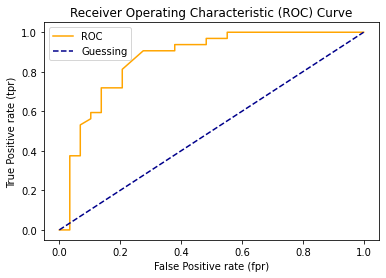

In [87]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """Plots a ROC curve given the false positive rate (fpr)
        and true positive rate (tpr) of a model
    """
    
    #plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #plot line with no predictive power (baseline)
    plt.plot([0,1,], [0,1], color="darkblue", linestyle="--", label = "Guessing")
    
    #customize plot
    plt.xlabel("False Positive rate (fpr)")
    plt.ylabel("True Positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [88]:
#look at auc score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)


0.8669181034482759

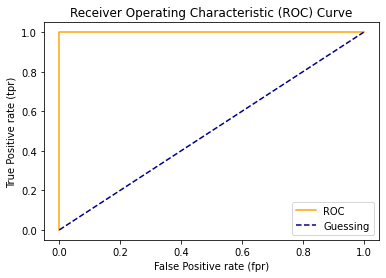

In [89]:
#Plot perfect ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [90]:
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

In essence, giving you an idea where the model is getting confused

In [91]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [92]:
#visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predictive Labels"])

Predictive Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [93]:
#install packages into a conda enviroment within a jupyter notebook
# import sys
#! is a bang command, it simulates running a command inside of a bash terminal
# !conda install --yes --prefix {sys.prefix} seaborn

In [94]:
#Make confusion matrix with seaborn heatmap (a color encoded matrix)
import seaborn as sns

#set font scale
sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#plot it using Seaborn
sns.heatmap(conf_mat)

ModuleNotFoundError: No module named 'seaborn'

In [95]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True,
                    cbar=False) #annotate the boxes with conf_mat info
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
plot_conf_mat(conf_mat)

NameError: name 'conf_mat' is not defined

**Classification Report**


In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [97]:
#Where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 #only 1 positive case

disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))
#Notice the accuracy is very high, but our goal was to find the 1 person who had a disease


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [98]:
#more resources for model evaluation
# https://scikit-learn.org/stable/modules/model_evaluation.html

Summary of classification metrics:

*Accuracy* is a good measure to start with if all classes are balanced (2.g. same amount of samples which are labelled with 0 or 1).

*Precision* and *recall* become more important when classes are imbalanced

* if false positive predications are worse tan false negatives, aim for higher precision.
* if false negative predications are worse than false positives, aimt for higher recall.
*F1-score* is a combination of precision and recalled

### 4.2.2 Regression model evaluation and metrics
Model evaluation metrics and documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced R squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squred does: Compares your models predictions to the mean of the targets. values can range from negative infinity (very poor) to 1. (very good). for example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. If your model perfectly predicts a range of numbers it's R^2 value would be 1

In [99]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20)

model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [100]:
model.score(x_test, y_test)

0.8654448653350507

In [101]:
from sklearn.metrics import r2_score

#fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [102]:
y_test.mean()

21.488235294117644

In [103]:
y_test_mean[:10]

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529])

In [104]:
#evidence of mentioned above - definition of r^2
r2_score(y_test, y_test_mean)

0.0

In [105]:
r2_score(y_test, y_test)

1.0

**Mean absolute error (MAE)**

Mean absolute error the average of the absolute differences between predictions and truth values. it gives you an idea of how wrong your models predictions are on average

In [106]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)

mae = mean_absolute_error(y_test, y_preds)
mae
#on average, the models predictions is plus or minus 2.13 off of truth data

2.136382352941176

In [107]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df


,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean squared error (MSE)**

In [108]:
#Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)

mse = mean_squared_error(y_test,y_preds)
mse

9.867437068627442

In [109]:
#get MSE manually
squared = np.square(df["differences"])
squared.mean()

9.867437068627442

### 4.2.3 using the scoring parameter

The scoring parameter changes the default way a model is scored

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#seed
np.random.seed(42)

#set up data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()


In [111]:
np.random.seed(42)

#cross validation accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [112]:
#cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [113]:
np.random.seed(42)

#cross validation accuracy - changed scoring parameter to accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [114]:
#cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [115]:
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [116]:
#recall
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [117]:
#f1
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.841476533416832

In [118]:
#try scoring on a regression model instead of classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

cross_val_score(model, x, y, cv=5, scoring="r2")

#RandomForestRegressor().score() default scoring method is r2, that is why scoring='none' results in same as scoring='r2'

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [119]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=5, scoring=None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [120]:
#Mean absolute error
cv_mae = cross_val_score(model, x, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [121]:
#Mean squared error
cv_mse = cross_val_score(model, x, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([ -7.8141513 , -12.94343325, -19.11614042, -46.28783248,
       -19.48161818])

In [122]:
np.mean(cv_mse)

-21.12863512415064

### 4.2 Using different evaluation metrics as Scikit-learn functions

**Classification evaluation functions**

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20)

clf = RandomForestClassifier()

clf.fit(x_train, y_train)

#make predictions
y_preds = clf.predict(x_test)

#evaluate classifier
print(f"classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)* 100: .2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

classifier metrics on the test set
Accuracy:  85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation functions**


In [124]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = boston_df.drop("target", axis=1)
y=boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20)

model = RandomForestRegressor()

#train the model on data
model.fit(x_train, y_train)

#make predictions using trained data on regression model
y_preds = model.predict(x_test)

#evaluate predictions from model
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"Mean absolute error: {mean_absolute_error(y_test, y_preds)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_preds)}")


R^2: 0.8654448653350507
Mean absolute error: 2.136382352941176
Mean squared error: 9.867437068627442


## 5. Improving a model

First predictions = baseline predictions
First model = baseline model

From data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve the data?

From a model perspective:
* Is there a better model that can be used for problem?
* Could we improve the current model? (possibly hyper parameters)

Difference between parameters and hyper parameters

Parameters: model finds patterns in data

HyperParameters: settings on a model that analyst can adjust to (potentially) improve model


**Three ways to adjust hyperparameters:**

1. By hand

2. Randomly with RandomSearchCV

3. Exhaustively with GridSearchCV

In [125]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [126]:
#hyperparameters that can be adjust on model
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

make 3 sets, Training set, validation set, and test set

In [127]:
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Try and adjust below to improve this model:

* max_depth
* max_features
* min_samples_lead
* min_samples_split
* n_estimators


In [128]:
#create an evaluation function for reuseability
def evaluate_model(y_true, y_preds):
    """Performs evaluation comparison on y_true vs. y_preds on Classification models"""
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metrics = {"accuracy: ": round(accuracy,2),
               "precision: ": round(precision,2),
               "recall :": round(recall,2),
               "f1 :": round(f1,2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Rcall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    
    return metrics

In [129]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [130]:
#manually split data into train, validation, and test sets

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle data to make sure data is random for validation/test/training
heart_disease_shuffled = heart_disease.sample(frac=1)

#split into x and y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#split the data into train, validation and test sets

#get 70% of data for training
train_split = round(0.7 * len(heart_disease_shuffled))

#get 15% of data for validation
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))

#split the data into x and y to be trained
x_train, y_train = x[:train_split], y[:train_split]

#split the data into x and y to be validated
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]

#split data into x test and y test to be tested
x_test, y_test = x[valid_split:], y[valid_split:]

len(x_train), len(x_valid), len(x_test)

#create classifier with default parameters
clf = RandomForestClassifier()

#fit on training data
clf.fit(x_train, y_train)

#make predictions on validation data (baseline predictions)
y_preds = clf.predict(x_valid)

#evaluate classifier on validation set using evaluate_model function
baseline_metrics = evaluate_model(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Rcall: 0.88
F1: 0.85


{'accuracy: ': 0.82, 'precision: ': 0.81, 'recall :': 0.88, 'f1 :': 0.85}

In [131]:
np.random.seed(42)

#create second classifier with different hyper parameters (n_estimators=100)
clf_2 = RandomForestClassifier(n_estimators=100)

#train
clf_2.fit(x_train, y_train)

#make predictions
y_preds_2 = clf_2.predict(x_valid)

#evaluate second classifier
clf_2_metrics = evaluate_model(y_valid, y_preds_2)
#notice slightly different results

Acc: 82.22%
Precision: 0.84
Rcall: 0.84
F1: 0.84


In [132]:
np.random.seed(42)

#create third classifier with different hyper parameters (n_estimators=100, max_depth=10)
clf_3 = RandomForestClassifier(n_estimators=100, max_depth=10)

#train
clf_3.fit(x_train, y_train)

#make predictions
y_preds_3 = clf_3.predict(x_valid)

#evaluate second classifier
clf_3_metrics = evaluate_model(y_valid, y_preds_3)
#notice slightly different results

Acc: 80.00%
Precision: 0.81
Rcall: 0.84
F1: 0.82


 ### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [133]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10,100,200,500,1000,1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2,4,6],
       "min_samples_leaf": [1,2,4]} #create a dictionary of hyperparameters we'd like to adjust as keys, and their corresponding value pairs as an array full of values to try

np.random.seed(42)

#split into x and y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) #n_jobs represents how much processing power the machine will give to the model, -1 means all power possible 

#setup RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator=clf,#choose default classifier to adjust
                            param_distributions=grid,#choose hyperparameters to adjust
                            n_iter=10,#choose number of models to try/combinations at random
                            cv=5, #choose if you want cross validation and size of cv
                            verbose=2)

#fit/train RandomizedSearchCV version of clf, making the previously used clf no longer necessary
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [134]:
#call best params to show which combination got the best results
rs_clf.best_params_

#when rs_clf.predict() is called it will default to this combination of hyperparameters

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [135]:
#make predictions with best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

#evaluate the predictions
rs_metrics = evaluate_model(y_test, rs_y_preds)


Acc: 81.97%
Precision: 0.77
Rcall: 0.86
F1: 0.81


In [136]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

### 5.3 HyperParameter tuning with GridSearchCV

difference between RandomSearchCV and GridSearchCV:
    GridSearchCV tries every combination within a given grid, while RandomSearchCV tries n_iter amount of random combinations
    i.e. GridSearchCV will take longer but will most likely yield better results, vice versa

In [137]:
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None, 30],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [2, 6],
         'min_samples_leaf': [1, 2,]}

In [138]:
from sklearn.model_selection import GridSearchCV, train_test_split

grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None, 30],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [2, 6],
         'min_samples_leaf': [1, 2,]} #create a dictionary of hyperparameters we'd like to adjust as keys, and their corresponding value pairs as an array full of values to try

np.random.seed(42)

#split into x and y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) #n_jobs represents how much processing power the machine will give to the model, -1 means all power possible 

#setup GridSearchCV

gs_clf = GridSearchCV(estimator=clf,#choose default classifier to adjust
                            param_grid=grid_2,#choose hyperparameters to adjust
                            cv=5, #choose if you want cross validation and size of cv
                            verbose=2)

#fit/train GridSearchCV version of clf, making the previously used clf no longer necessary
gs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2,

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [139]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [140]:
gs_y_preds = gs_clf.predict(x_test)

#evaluate predictions
gs_metrics = evaluate_model(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Rcall: 0.82
F1: 0.78



Compare different models metrics


NOTE - RESULTS OF THIS GRAPH ARE INACCURATE DUE TO TESTS BEING EVALUATED ON DATA THAT IS SPLIT DIFFERENTLY/RANDOMIZED
https://colab.research.google.com/drive/1ISey96a5Ag6z2CvVZKVqTKNWRwZbZl0m

<AxesSubplot:>

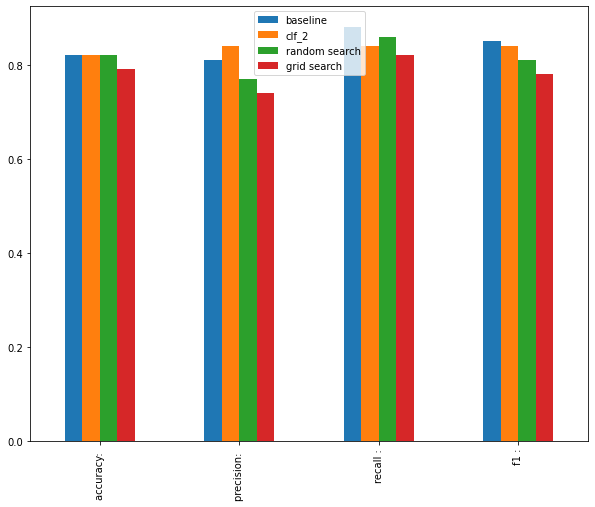

In [141]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf_2": clf_2_metrics,
                               "random search": rs_metrics,
                               "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8))

NOTE -  look into Correlation Analysis and Forward/Backward Attribute Selection

### 6. Saving and loading ML models
Two ways to save and load models: 

    1. With Pythons 'Pickle' module
    2. with the 'joblib' module

1. Pickle

In [142]:
import pickle

# Save an existing model to file

pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb")) #.dump function for saving to a file, first param is what you want to save, second is the name of the file you want to save it to, third 'wb' stand for wright binary, used for when writing to a file



In [143]:
#Load a saved model using pickle
loaded_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))#first param is name of model file, second 'rb' means read binary, meant for reading files


In [144]:
#test if model was properly loaded

#make some predictions with loaded model
pickle_y_preds = loaded_model.predict(x_test)

#evaluate model
evaluate_model(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 0.74
Rcall: 0.82
F1: 0.78


{'accuracy: ': 0.79, 'precision: ': 0.74, 'recall :': 0.82, 'f1 :': 0.78}

2. joblib module

In [145]:
from joblib import dump, load

#save a model to a file using joblib
dump(gs_clf, filename="gs_random_forst_model_1.joblib")#dump function, first param is what to be exported, second is what you want to name the file it gets loaded into



['gs_random_forst_model_1.joblib']

In [146]:
#import a saved joblib model

loaded_job_model = load("gs_random_forst_model_1.joblib") #now model is saved into loaded_job_model

In [147]:
#make and evaluate joblib predictions


joblib_y_preds = loaded_job_model.predict(x_test)

#evaluate model
evaluate_model(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 0.74
Rcall: 0.82
F1: 0.78


{'accuracy: ': 0.79, 'precision: ': 0.74, 'recall :': 0.82, 'f1 :': 0.78}

 NOTE - joblib is the preferred way of loading and saving models using scikit-learn

## 7. Putting it all together

In [148]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data[:20]

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [149]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [150]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do: (using pipeline)
1. Fill missing data
2. convert data to numbers
3. build a model on the data

In [151]:
#getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#setup random seed
import numpy as np
np.random.seed(42)

#import data and drop rows with missing labels/incomplete data
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

#define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])


#set up preprocessing steps (fill missing values then convert to numbers)

preprocessor = ColumnTransformer(transformers=[
    ("cat", categorical_transformer, categorical_features),
    ("door", door_transformer, door_feature),
    ("num", numeric_transformer, numeric_features)
])

#create a preprocessing and modelling pipeline

model = Pipeline(steps=[("preprocessor", preprocessor),
                       ("model", RandomForestRegressor())])

 
#split data
x = data.drop("Price", axis=1)
y = data["Price"]

#train model
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2)

model.fit(x_train, y_train)

#score model
model.score(x_test, y_test)

0.22188417408787875